In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KDTree
from statistics import mean 
import math
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
walk_1 = pd.read_csv('1-walk-1.csv', header=0, names=['SSID', 'Time', 'RSSI'])
walk_2 = pd.read_csv('1-walk-2.csv', header=0, names=['SSID', 'Time', 'RSSI'])
locations = pd.read_csv('ap_locations_1.csv', header=0, names=['SSID', 'x', 'y'])
offline = pd.read_csv('offline.csv', header=0, names=['x', 'y', 'alpha', 'SSID', 'RSSI'])

In [19]:
def walk2np(csv_thing):
    dim = int(csv_thing.to_numpy().shape[0]/3)
    np_thing = np.ndarray((dim, 3))

    index = [0, 0, 0]
    for w in csv_thing.to_numpy():
        if w[0] == 'a':
            np_thing[index[0]][0] = w[2]
            index[0] += 1
        elif w[0] == 'b':
            np_thing[index[1]][1] = w[2]
            index[1] += 1
        elif w[0] == 'c':
            np_thing[index[2]][2] = w[2]
            index[2] += 1
    return np_thing

def normalize(ori):
    other = np.ndarray(ori.shape)
    for col in range(ori.shape[1]):
        ori_col = abs(ori[:, col])
        other[:, col] = (ori_col - ori_col.min())/(ori_col.max() - ori_col.min())
    return other

def fit_linear(x, y):
    return stats.linregress(x, y)

def regression(ori, tx):
    reg = np.ndarray(ori.shape)
    tx = np.linspace(1, ori.shape[0], ori.shape[0])
    res_a = fit_linear(tx, ori[:, 0])
    res_b = fit_linear(tx, ori[:, 1])
    res_c = fit_linear(tx, ori[:, 2])
    reg[:, 0] = res_a.intercept + res_a.slope*tx
    reg[:, 1] = res_b.intercept + res_b.slope*tx
    reg[:, 2] = res_c.intercept + res_c.slope*tx
    return reg

def plot_wifi(norm, reg, tx, title='Walk 1'):
    plt.figure(figsize=(13, 6), dpi=144)
    plt.plot(tx, norm[:, 0], color='#78552b') # color: kyara
    plt.plot(tx, norm[:, 1], color='#58b2dc') # color: sora
    plt.plot(tx, norm[:, 2], color='#7aa23f') # color: moegi
    plt.plot(tx, reg[:, 0], ':', color='#78552b') # color: kyara
    plt.plot(tx, reg[:, 1], ':', color='#58b2dc') # color: sora
    plt.plot(tx, reg[:, 2], ':', color='#7aa23f') # color: moegi
    plt.title(title)
    plt.xlabel('Time (ms)')
    plt.ylabel('Strength (dBm)')
    plt.legend(['a', 'b', 'c'])
    plt.show()

   SSID      Time  RSSI
0     a  13:14:42   -33
1     a  13:14:46   -30
2     a  13:14:49   -31
3     a  13:14:52   -31
4     a  13:14:55   -35
..  ...       ...   ...
64    b  13:15:43   -58
65    b  13:15:46   -56
66    b  13:15:50   -65
67    b  13:15:53   -52
68    b  13:15:57   -65

[69 rows x 3 columns]
[[-33. -42. -58.]
 [-30. -43. -61.]
 [-31. -47. -56.]
 [-31. -43. -50.]
 [-35. -34. -46.]
 [-35. -40. -49.]
 [-38. -43. -47.]
 [-41. -41. -45.]
 [-49. -42. -43.]
 [-53. -40. -44.]
 [-51. -49. -42.]
 [-51. -46. -57.]
 [-50. -57. -38.]
 [-52. -49. -38.]
 [-58. -49. -38.]
 [-53. -52. -42.]
 [-51. -67. -38.]
 [-52. -58. -42.]
 [-54. -58. -49.]
 [-48. -56. -52.]
 [-51. -65. -52.]
 [-50. -52. -51.]
 [-53. -65. -46.]]
[[-33.60869565 -37.56521739 -51.05434783]
 [-34.70355731 -38.64822134 -50.69762846]
 [-35.79841897 -39.7312253  -50.34090909]
 [-36.89328063 -40.81422925 -49.98418972]
 [-37.98814229 -41.8972332  -49.62747036]
 [-39.08300395 -42.98023715 -49.27075099]
 [-40.17786561 -44.063

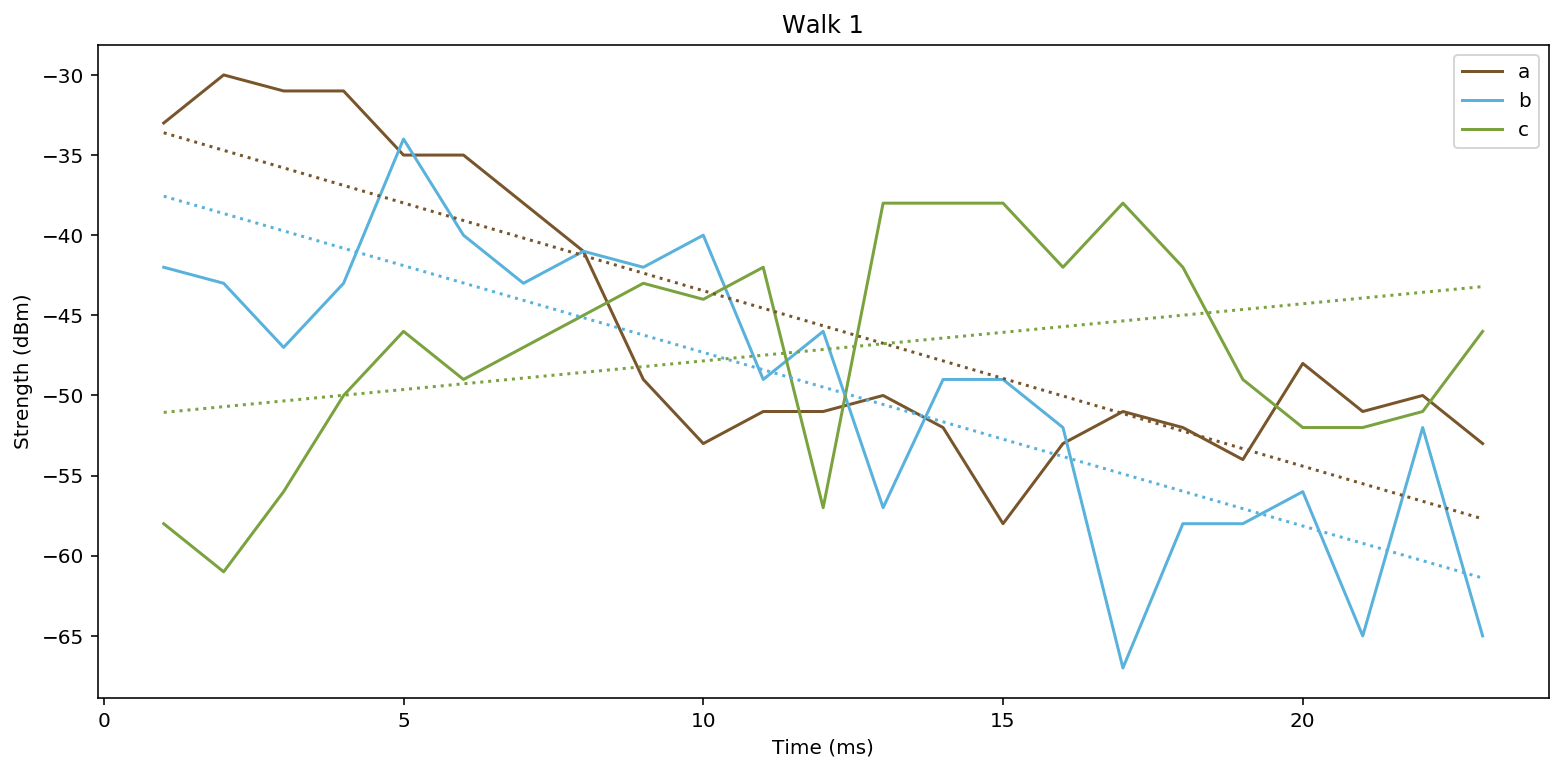

In [20]:
print(walk_1)
    
walk_1_data = walk2np(walk_1)
tx_1 = np.linspace(1, walk_1_data.shape[0], walk_1_data.shape[0])
print(walk_1_data)

# walk_1_data_norm = normalize(walk_1_data)
walk_1_data_norm = walk_1_data

walk_1_data_reg = regression(walk_1_data_norm, tx_1)
print(walk_1_data_reg)

plot_wifi(walk_1_data_norm, walk_1_data_reg, tx_1, title='Walk 1')

   SSID      Time  RSSI
0     a  13:32:45   -42
1     a  13:32:48   -42
2     a  13:32:51   -41
3     a  13:32:55   -41
4     a  13:32:58   -44
5     a  13:33:01   -36
6     a  13:33:04   -36
7     a  13:33:08   -41
8     a  13:33:11   -40
9     a  13:33:15   -42
10    a  13:33:18   -40
11    a  13:33:21   -44
12    a  13:33:25   -46
13    a  13:33:28   -48
14    a  13:33:31   -49
15    a  13:33:35   -50
16    a  13:33:38   -52
17    a  13:33:41   -53
18    a  13:33:45   -51
19    a  13:33:48   -50
20    c  13:32:45   -57
21    c  13:32:48   -61
22    c  13:32:51   -54
23    c  13:32:55   -56
24    c  13:32:58   -60
25    c  13:33:01   -54
26    c  13:33:04   -53
27    c  13:33:08   -48
28    c  13:33:11   -52
29    c  13:33:15   -47
30    c  13:33:18   -65
31    c  13:33:21   -37
32    c  13:33:25   -39
33    c  13:33:28   -40
34    c  13:33:31   -36
35    c  13:33:35   -37
36    c  13:33:38   -40
37    c  13:33:41   -44
38    c  13:33:45   -44
39    c  13:33:48   -44
40    b  13:32:4

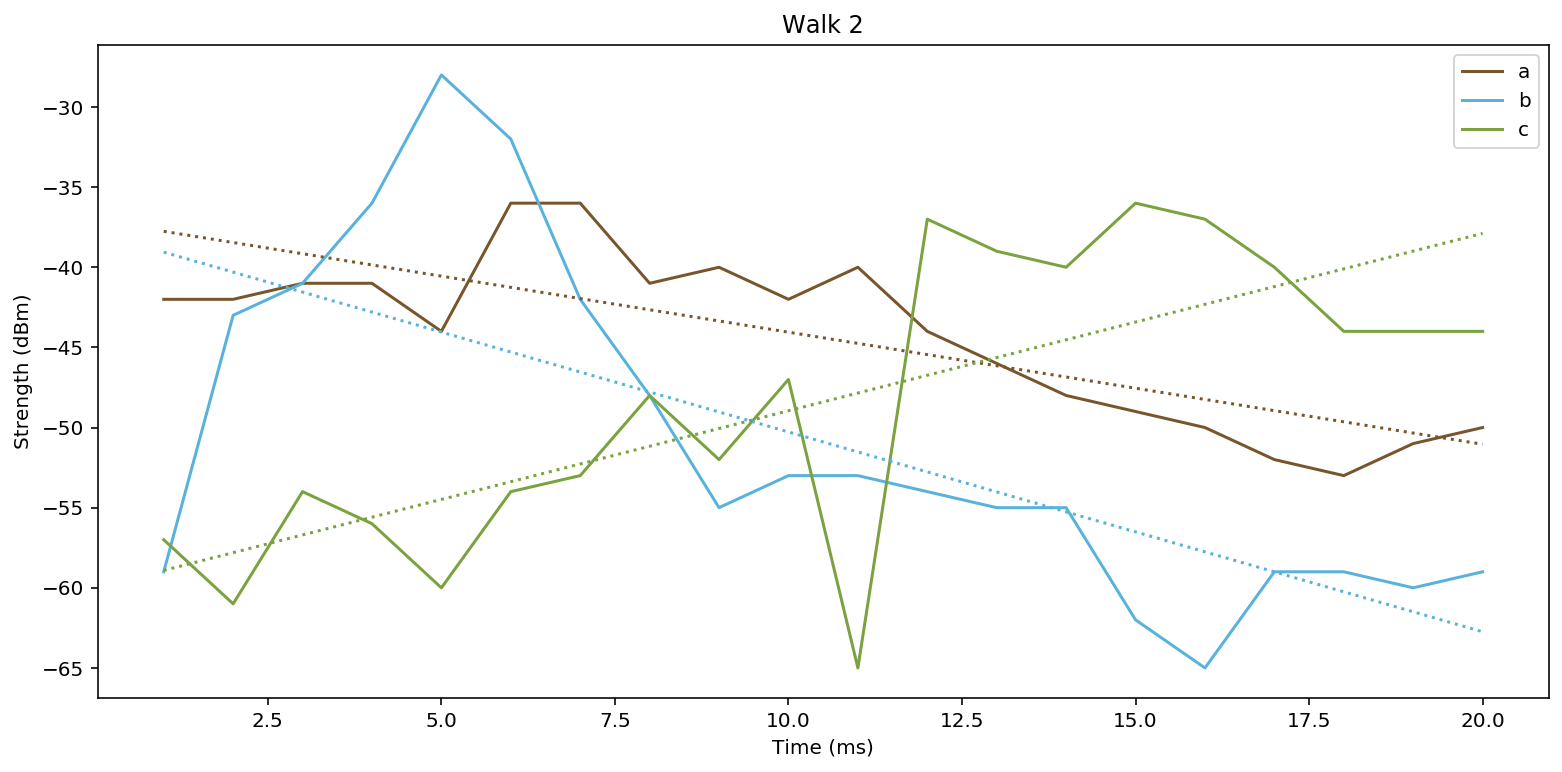

In [21]:
print(walk_2)
    
walk_2_data = walk2np(walk_2)
tx_2 = np.linspace(1, walk_2_data.shape[0], walk_2_data.shape[0])
print(walk_2_data)

# walk_1_data_norm = normalize(walk_1_data)
walk_2_data_norm = walk_2_data

walk_2_data_reg = regression(walk_2_data_norm, tx_2)
print(walk_2_data_reg)

plot_wifi(walk_2_data_norm, walk_2_data_reg, tx_2, title='Walk 2')

In [22]:
print(offline.shape)
print(offline)

(93, 5)
    x  y  alpha SSID  RSSI
0   1  2      0    a   -39
1   1  2      0    b   -45
2   1  2      0    c   -46
3   1  2    270    a   -49
4   1  2    270    b   -38
.. .. ..    ...  ...   ...
88  4  3    180    b   -49
89  4  3    180    c   -43
90  4  2    180    a   -46
91  4  2    180    b   -44
92  4  2    180    c   -50

[93 rows x 5 columns]


In [23]:
n_points = int(offline.shape[0]/3)
print(n_points)
offline_data = np.ndarray((n_points, 3))
offline_label = np.ndarray((n_points, 2))

coor_a = (1, 3)
coor_b = (1, 1)
coor_c = (3, 2)

def e_dist(p0, p1):
    # Euclidean distance
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

for i in range(n_points):
    i3 = i*3
    x = offline['x'][i3]
    y = offline['y'][i3]
    data_row = np.zeros((3, ))
    for ap in range(3):
        SSID = offline['SSID'][i3+ap]
        RSSI = offline['RSSI'][i3+ap]
        if SSID == 'a':
            data_row[0] = RSSI
        elif SSID == 'b':
            data_row[1] = RSSI
        elif SSID == 'c':
            data_row[2] = RSSI
#     dist_a = 
    offline_data[i] = data_row
    offline_label[i] = np.array([x, y])
    
print(offline_data)
offline_data_norm = normalize(offline_data)
print(offline_data_norm)
print(offline_label)

31
[[-39. -45. -46.]
 [-49. -38. -52.]
 [-37. -42. -54.]
 [-37. -49. -38.]
 [-37. -52. -40.]
 [-47. -56. -42.]
 [-46. -45. -44.]
 [-39. -54. -56.]
 [-38. -57. -45.]
 [-47. -62. -51.]
 [-50. -48. -50.]
 [-45. -47. -48.]
 [-49. -55. -47.]
 [-51. -47. -45.]
 [-48. -51. -44.]
 [-43. -45. -52.]
 [-50. -58. -59.]
 [-55. -55. -42.]
 [-46. -50. -45.]
 [-40. -53. -49.]
 [-47. -55. -45.]
 [-53. -65. -53.]
 [-52. -61. -58.]
 [-47. -58. -44.]
 [-42. -37. -51.]
 [-39. -45. -52.]
 [-34. -39. -48.]
 [-48. -44. -44.]
 [-51. -50. -48.]
 [-48. -49. -43.]
 [-46. -44. -50.]]
[[0.23809524 0.28571429 0.38095238]
 [0.71428571 0.03571429 0.66666667]
 [0.14285714 0.17857143 0.76190476]
 [0.14285714 0.42857143 0.        ]
 [0.14285714 0.53571429 0.0952381 ]
 [0.61904762 0.67857143 0.19047619]
 [0.57142857 0.28571429 0.28571429]
 [0.23809524 0.60714286 0.85714286]
 [0.19047619 0.71428571 0.33333333]
 [0.61904762 0.89285714 0.61904762]
 [0.76190476 0.39285714 0.57142857]
 [0.52380952 0.35714286 0.47619048]
 [0.71

In [24]:
offline_tree = KDTree(offline_data, leaf_size=20)

<function matplotlib.pyplot.show(*args, **kw)>

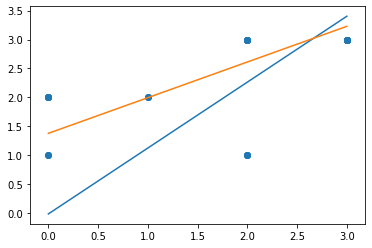

In [42]:
# print(dist)
# print(ind)

def mean_point(arr):
    x = np.mean(arr[:, 0])
    y = np.mean(arr[:, 1])
    return x, y
    
dist_1, ind_1 = offline_tree.query(walk_1_data_reg, k=1)
# print(dist)
# print(ind)

coor_1 = []
for i in range(ind.shape[0]):
#     print(offline_label[ind[i]])
    x, y = mean_point(offline_label[ind[i]])
#     print("[%.2f, %.2f]"%(x, y))
    coor_1.append([x, y])
coor_1 = np.array(coor_1)


x_min = int(coor_1[:, 0].min())
x_max = int(coor_1[:, 0].max())
x_step = x_max - x_min + 1
tx_11 = np.linspace(x_min, x_max, coor_1.shape[0])
def regression_plot(ori, tx):
    reg = np.ndarray(ori.shape)
    res_a = fit_linear(tx, ori[:, 0])
    res_b = fit_linear(tx, ori[:, 1])
    reg[:, 0] = res_a.intercept + res_a.slope*tx
    reg[:, 1] = res_b.intercept + res_b.slope*tx
    return reg
    
coor_1_reg = regression_plot(coor_1, tx_11)
plt.plot(tx_11, coor_1_reg)
plt.scatter(coor_1[:, 0], coor_1[:, 1])
plt.show

In [26]:
def mean_point(arr):
    x = np.mean(arr[:, 0])
    y = np.mean(arr[:, 1])
    return x, y
    
dist_2, ind_2 = offline_tree.query(walk_2_data_reg, k=1)
print(dist_2)
print(ind_2)

for i in range(ind_2.shape[0]):
#     print(offline_label[ind_2[i]])
    x, y = mean_point(offline_label[ind_2[i]])
    print("[%.2f, %.2f]"%(x, y))

[[5.77787829]
 [4.41537159]
 [3.48468111]
 [3.3654667 ]
 [3.08484586]
 [2.24511593]
 [1.87983172]
 [2.92623591]
 [3.32929487]
 [3.54223581]
 [3.46224404]
 [3.22588121]
 [1.44695668]
 [0.56296111]
 [1.60430004]
 [2.11145183]
 [3.54906182]
 [5.22200328]
 [6.96266214]
 [8.7306287 ]]
[[ 2]
 [ 2]
 [ 2]
 [ 2]
 [25]
 [15]
 [15]
 [15]
 [11]
 [11]
 [18]
 [20]
 [20]
 [20]
 [ 5]
 [23]
 [23]
 [23]
 [23]
 [23]]
[1.00, 2.00]
[1.00, 2.00]
[1.00, 2.00]
[1.00, 2.00]
[0.00, 1.00]
[2.00, 3.00]
[2.00, 3.00]
[2.00, 3.00]
[2.00, 1.00]
[2.00, 1.00]
[3.00, 3.00]
[3.00, 1.00]
[3.00, 1.00]
[3.00, 1.00]
[2.00, 2.00]
[3.00, 1.00]
[3.00, 1.00]
[3.00, 1.00]
[3.00, 1.00]
[3.00, 1.00]
